# Does staying in school (and not working) prevent teen smoking and drinking? 

### [by Robert Jensen (2012) published in Journal of Health Economics](https://www.sciencedirect.com/science/article/pii/S0167629612000586#tbl0005)

## Abstract 

## Introduction 

The storng assosication between education and health behavior was shown in many papers. In this simulation study, the data from the above paper was genrated in order to predict the smoking and drinking amoung the youth. Author, by providing information on returns on schooling, has found increase in the schooling among male students in Dominican Republic in the first paper. Later he established that treated students smokes less at age 18 and start drinking later than their untreated peers.  

And students at randomly selected schools who were provided with information on the measured returns completed on average 0.20 years more schooling over the next 4 years than those who were not given this information. To the extent that this intervention affects drinking and smoking only through the impact on schooling (a point we discuss below), the random assignment in this experiment provides an exogenous shock to schooling, uncorrelated with omitted variables and with a clear direction of causality, with which to identify the relationship between schooling and alcohol and tobacco use.

## Data

The sample was drawn in two stages. First, from the 30 largest cities and towns (representing about two-thirds of the population), author chose 150 sampling clusters at random, with the number of clusters chosen in each city or town approximately proportional to its share of the combined population of the 30 cities/towns. For each of the 150 clusters, he selected the school where students from that cluster attend 8th grade, the final year of primary school. From each school he selected 15 boys at random from a list of all currently enrolled 8th grade students. All 2011 students were administered a survey between April and May 2001, close to the end of the academic year, gathering information on a variety of individual and household characteristics, as well as some simple questions on expected earnings by education.


A second survey was conducted shortly after the beginning of the next academic term (October 2001), with respondents interviewed again about perceived returns to education and current enrolment status, as well as health-related behaviors. A third round, follow-up survey was conducted in May and June of 2005, by which time students should have been finishing their last year of secondary school; for the approximately 120 students still enrolled in 2005 but not yet in their final year of school (due primarily to grade repetition), he conducted follow-ups for the next 2 years. He was able to re-interview 94% of youths in round 2 and 89% in round 3 (though for the educational outcomes, we were able to track students administratively even if we did not interview them, which reduced attrition to 3 and 9%, respectively). Attrition rates were very similar for treatment and control youths; in round 2, he was able to re-interview 1053 of the 1125 control students and 1057 of the 1125 treatment students, and in round 3, he was able to re-interview 1006 of the controls and 1005 of the treatment sample. 

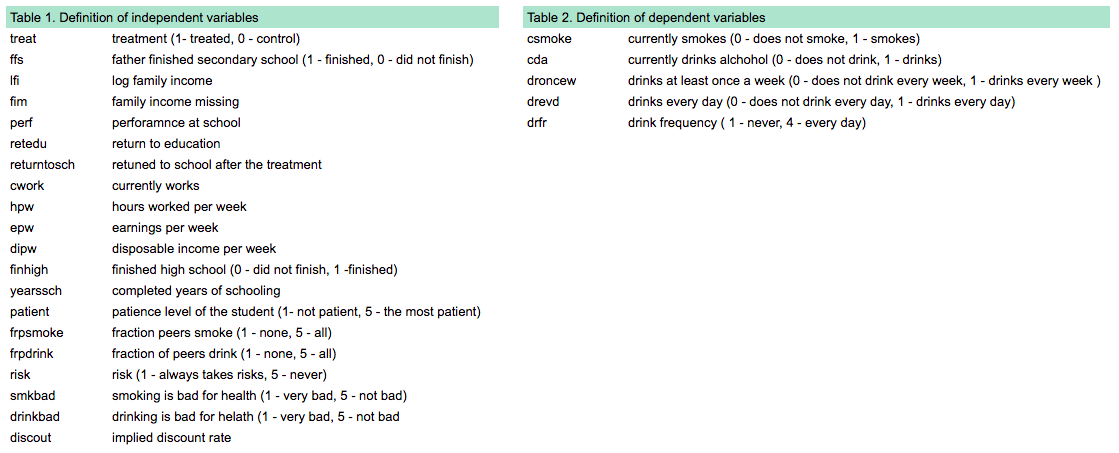

In [6]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(rsample)     
library(randomForest) 
library(ranger)       
library(caret)        
#library(h2o) 
library(e1071)
library(lattice)

## Descriptive statistics 



In [7]:
source('auxiliary/dgp.r')

Only 5% of boys reported smoking in round 2, but this increases to 13% by round 3. By contrast, drinking alcohol is more widespread: in round 2, when most of the sample is 14 years old, 61% of boys already report drinking. Although that fraction rises only to 73% in round 3, the frequency of drinking increases substantially; the fraction reporting they drink every week increases from 19% to 46%, and the fraction reporting they drink every day increases from 2% to 13%.

In [12]:
head(X2)
head(Y2)

ffs,lfi,perf,age,returntosch,cwork2,hpw2,epw2,retedu,dipw2,treat,frpsmoke2,frpdrink2
did not finish,8.216784,-0.20684369,15.19649,returned,0,0,0,889.2401,12.395840,control,3,1
finished,8.228862,0.91149259,13.47200,returned,0,0,0,1059.2283,71.373427,control,4,3
did not finish,7.794940,1.54033283,13.84807,returned,0,0,0,761.8480,18.972254,treated,3,4
did not finish,7.861786,-0.27990041,14.47245,did not return,0,0,0,942.1818,15.694683,treated,3,4
did not finish,8.214905,0.08199672,14.09205,did not return,0,0,0,569.6346,8.586014,control,3,4
did not finish,8.055448,-1.14379594,13.54693,returned,0,0,0,539.7097,121.050983,control,5,4


csmoke2,cda2,droncew2,drevd2,drfr2
does not smoke,drinks,does not drink once a week,does not drink every day,2
does not smoke,drinks,does not drink once a week,does not drink every day,2
does not smoke,drinks,does not drink once a week,does not drink every day,4
does not smoke,drinks,does not drink once a week,does not drink every day,3
does not smoke,does not drink,does not drink once a week,does not drink every day,2
does not smoke,drinks,does not drink once a week,does not drink every day,2


For adults, moderate amounts of alcohol may not have adverse health consequences; the greater concern is over excessive or binge drinking. However, for the young adolescents we focus on, alcohol consumption may have important consequences in even smaller amounts, as noted in the introduction. And in particular, the analysis is focused primarily on daily drinking, which is likely to constitute a greater concern.

In [9]:
head(X3)
head(Y3)

ffs,lfi,perf,age,treat,finhigh,yearssch,cwork3,hpw3,epw3,dipw3,patient3,frpsmoke3,frpdrink3,risk,smkbad,drinkbad
did not finish,8.404272,1.876010,12.65345,control,did not finish,6.928559,0,0.000000,0.000000,242.92931,3,5,3,1,3,3
did not finish,7.731665,1.691903,13.56671,treated,did not finish,8.293929,0,0.000000,0.000000,283.06293,2,1,3,1,4,2
finished,8.374400,1.684332,15.19847,treated,did not finish,11.094978,1,12.206373,6.586222,282.67205,1,2,4,3,3,3
did not finish,8.308926,2.839158,14.08827,treated,did not finish,10.028860,1,20.257362,1748.009198,796.59489,2,4,5,2,3,3
did not finish,8.016659,1.674537,15.23163,control,did not finish,10.600821,1,17.291973,408.102758,51.00468,4,4,2,2,2,3
did not finish,8.276552,1.419836,13.49367,treated,did not finish,9.204890,1,4.097984,336.792551,602.57562,3,4,4,3,3,2


csmoke3,cda3,droncew3,drevd3,drfr3
does not smoke,does not drink,does not drink once a week,drinks every day,1
does not smoke,does not drink,drinks once a week,does not drink every day,2
does not smoke,does not drink,drinks once a week,does not drink every day,2
smokes,does not drink,drinks once a week,does not drink every day,3
does not smoke,drinks,does not drink once a week,does not drink every day,2
does not smoke,drinks,does not drink once a week,drinks every day,3


As noted above, the survey gathered data on several of the mechanisms through which schooling and work may affect drinking and smoking: disposable income, patience, risk aversion, peer behavior and perceptions of harm associated with smoking and drinking. 

In [10]:
print('Structure of the independent variables in the second round')
str(X2)
print('Structure of the independent variables in the third round')
str(X3)

[1] "Structure of the independent variables in the second round"
'data.frame':	2011 obs. of  13 variables:
 $ ffs        : Factor w/ 2 levels "did not finish",..: 1 2 1 1 1 1 1 2 2 2 ...
 $ lfi        : num  8.22 8.23 7.79 7.86 8.21 ...
 $ perf       : num  -0.207 0.911 1.54 -0.28 0.082 ...
 $ age        : num  15.2 13.5 13.8 14.5 14.1 ...
 $ returntosch: Factor w/ 2 levels "did not return",..: 2 2 2 1 1 2 1 2 1 2 ...
 $ cwork2     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 2 1 ...
 $ hpw2       : num  0 0 0 0 0 ...
 $ epw2       : num  0 0 0 0 0 ...
 $ retedu     : num  889 1059 762 942 570 ...
 $ dipw2      : num  12.4 71.37 18.97 15.69 8.59 ...
 $ treat      : Factor w/ 2 levels "control","treated": 1 1 2 2 1 1 2 1 2 2 ...
 $ frpsmoke2  : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 3 3 5 1 2 2 5 ...
 $ frpdrink2  : Factor w/ 5 levels "1","2","3","4",..: 1 3 4 4 4 4 5 3 4 1 ...
[1] "Structure of the independent variables in the third round"
'data.frame':	2011 obs. of  17 variable

In order to establish the commonly found relationship between education and health behaviors in data set, and for comparison with the experimental results, researcher starts by estimating least squares regressions of smoking and daily drinking on education and work status, using individuals in the control group only. For each outcome, he presents three separate regressions: first including years of school only, then only with an indicator for work status, and finally with both work and years of schooling, and his measures of possible mechanisms. All regressions also include the following baseline covariates: father's education, log of family income and teacher's reports of student performance in school.

The table below shows results of the OLS regressions of smoking and drinking on schooling and work in round 3 (control group only).

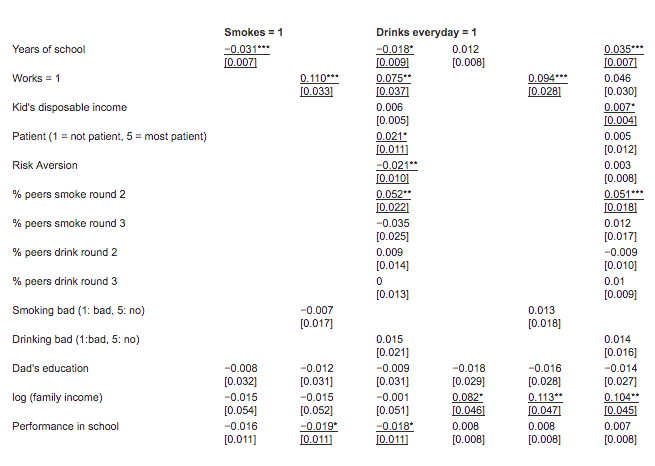

Researcher finds that education is associated with a lower likelihood of smoking, and that work results in a higher likelihood of smoking, and these effects are statistically significant when included individually or jointly. Education and work both appear to increase daily drinking – and the effect of education actually increases when we control for work status and for mechanisms. 

## Method

## Results

##### Currently drinks round 2

In [ ]:
source('auxiliary/cda2.R')
rf.cda2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3)

In [ ]:
importance(rf.cda2)

In [ ]:
source('auxiliary/cda22.R')
rff.cda2

#To see if 1000 trees is enough for optimal classification, we can plot the error rates for ntree=1000
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3.1)

In [ ]:
## adding more trees did not help 

In [ ]:
tuneRF(X2.train, Y2.train$cda2)

In [ ]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$cda2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=3, repr.plot.height=3)

In [ ]:
rf.cda2.pred<-predict(rf.cda2, X2.test)
confusionMatrix(rf.cda2.pred, Y2.test$cda2)

In [ ]:
varImp(rf.cda2)
varImpPlot(rf.cda2)
options(repr.plot.width=15, repr.plot.height=5.5)

## Tree 3rd round

In [ ]:
source('auxiliary/cda3.r')
rf.cda3
ggplot(data=oob.error.data31, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=4, repr.plot.height=3)


In [ ]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y3.train$cda3~., data=X3.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

In [ ]:
tuneRF(X3.train, Y3.train$cda3)

##### Currently smokes round 2 

In [ ]:
source('auxiliary/csmoke2.r')
rf.csmoke2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=4.5, repr.plot.height=3)

In [ ]:
tuneRF(X2.train, Y2.train$csmoke2)

In [ ]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=9)
for (i in 1:9) {
    temp.model<-randomForest(Y2.train$csmoke2~., data=X2.train, mtry=i, ntree=100)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

The OOB error is often claimed to be an unbiased estimator for the true error rate (Breiman;
2001; Goldstein et al.; 2011; Zhang et al.; 2010). However, for two-class classification problems
it was reported that the OOB error overestimates the true prediction error (Bylander; 2002;
Mitchell; 2011).  It was thus recommended to
use the OOB error only as an upper bound for the true prediction error (Mitchell; 2011). However,
Mitchell (2011) considered only settings with completely balanced samples, sample sizes below 60
and two response classes, limiting the generality of the results.

The size of this subset is usually referred to as mtry. In practical applications, the most common
approach for choosing appropriate values for mtry is to select the value over a grid of plausible
values which yields the smallest OOB error (Oliveira et al.; 2012; Hassane et al.; 2008; Nicodemus
et al.; 2010). Also in works on RF methodology, the OOB error has frequently been used to choose
an appropriate value for mtry (Nicodemus and Malley; 2009; Kim et al.; 2006). In principle, other
procedures like (repeated) cross-validation may be applied for selecting an optimal value for mtry,
but the OOB error is usually the first choice for parameter tuning.

It is well
known that classification trees are greatly affected by class imbalance in the sense that trees that
were trained on unbalanced samples preferentially classify new observations into the class from
which most training observations come. 

With respect to data-dependent factors, the present studies identified the response class distribution of the original sample, the predictor number, the correlation between predictors as well
as their predictive ability as relevant factors that have an effect on the bias.

### Droncew - Drinks at least once a week round 2

In [ ]:
source('auxiliary/droncew2.r')
rf.droncew2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=3.1)

In [ ]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$droncew2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

### Drevd Drinks every day round 2 

In [ ]:
source('auxiliary/drevd2.r')
rf.drevd2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3.1)

##### Drinking frequency round 2

In [ ]:
rf.drfr2<-randomForest(formula=Y2.train$drfr2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.drfr2


In [ ]:
tuneRF(X2.train, Y2.train$drfr2)

##### Currently smokes round 3

In [ ]:
source('auxiliary/csmoke3.r')
rf.csmoke3

In [ ]:
tuneRF(X3.train, Y3.train$csmoke3)